In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

Resolvio: Ing. Andres Chaparro

In [2]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

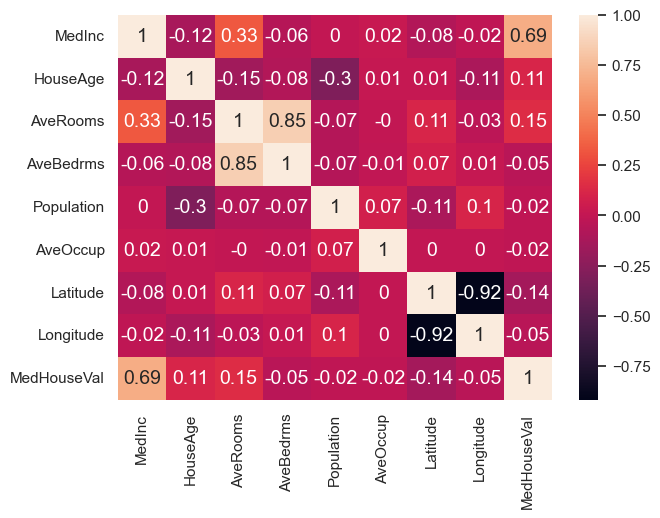

In [6]:
plt.figure(figsize=(7, 5))
correlacion_profit = df_california.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, annot_kws={"size": 14})
plt.show()

El atributo **MedInc** es el que tiene mayor correlacion con el target que es **MedHouseVal**. O sea, el ingreso medio con la mediana del costo de casas en el bloque.

Los atributos que estan mas correlacionados son:
- **AveBedrms** con **AveRooms**. O sea, el numero promedio de dormitorios con el numero promedio de habitaciones por hogar.
- **Latitude** con **Longitude**. Osea, la latitud con la longitud del bloque.
- **MedInc** con **AveRooms**. Osea, el ingreso medio en el bloque con el numero promedio de habitaciones por hogar.

2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

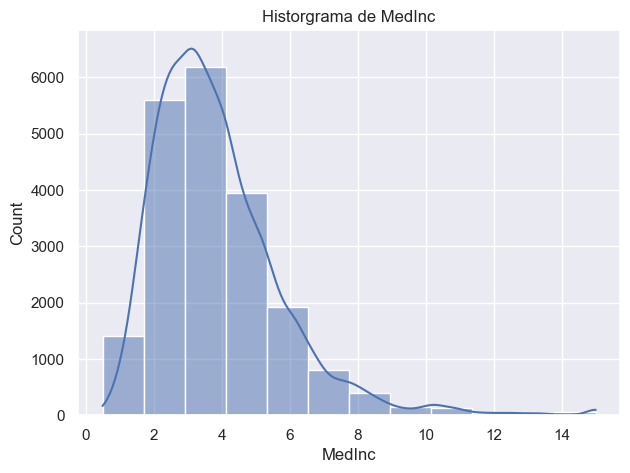

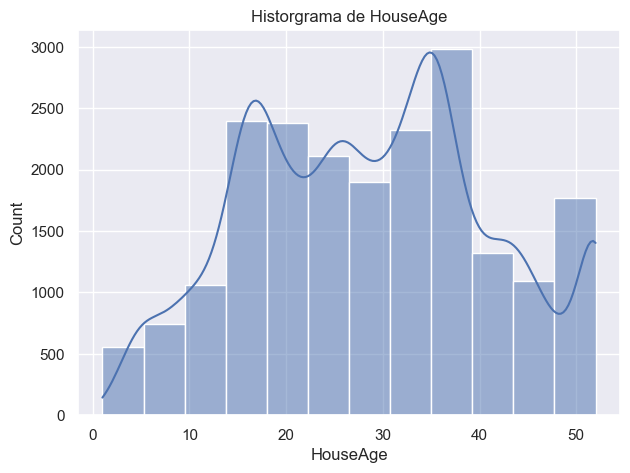

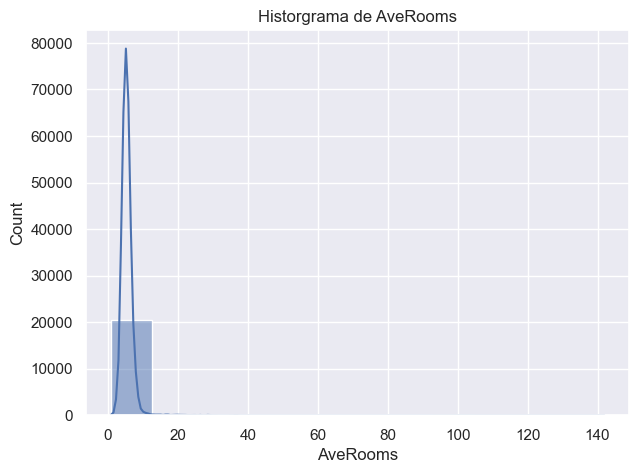

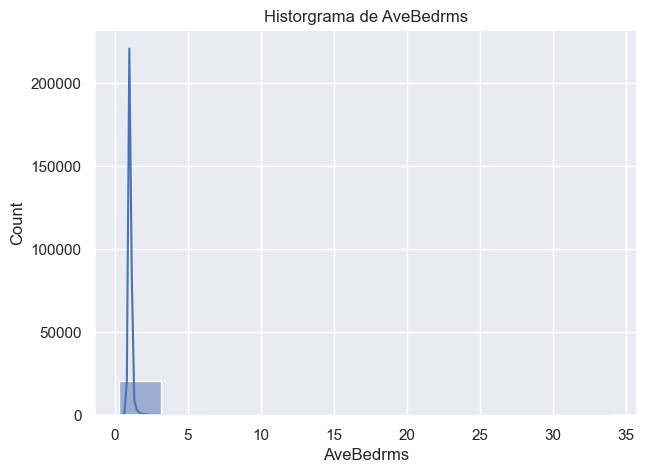

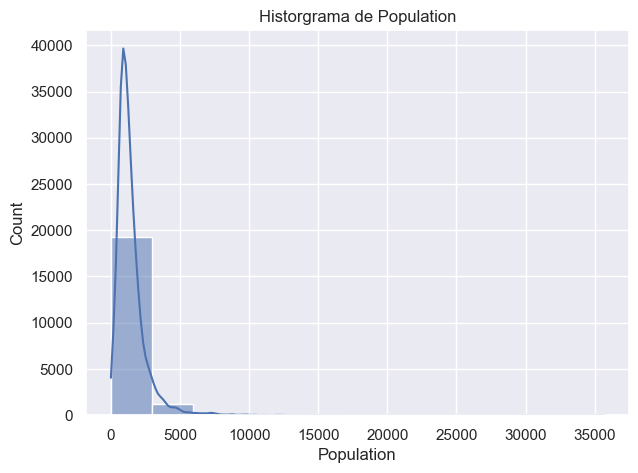

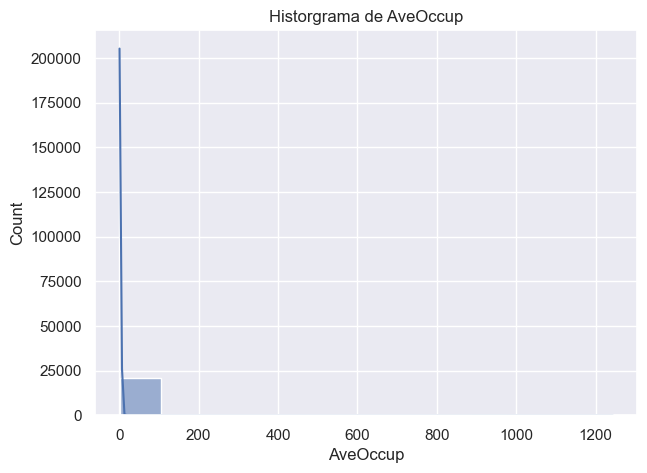

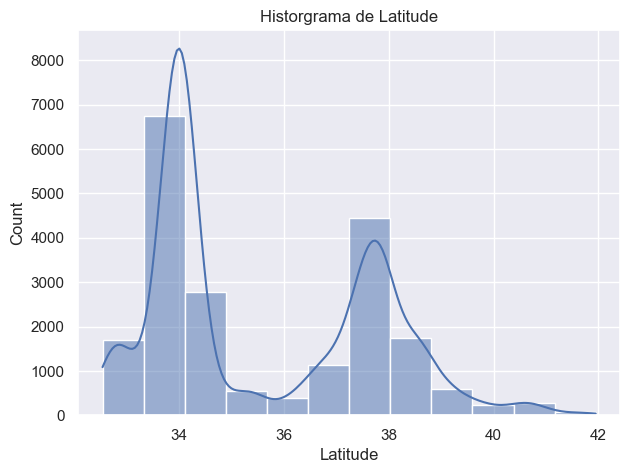

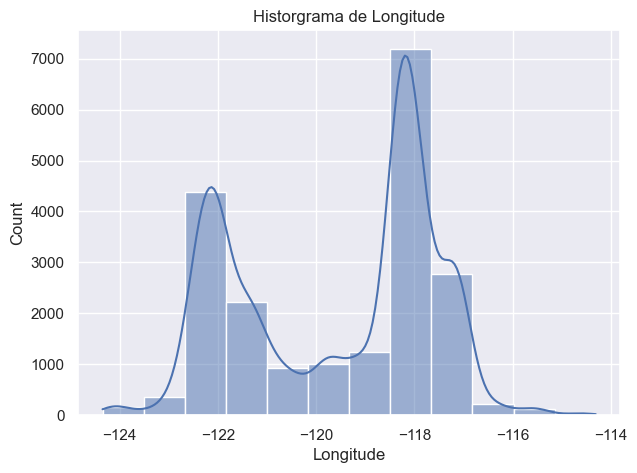

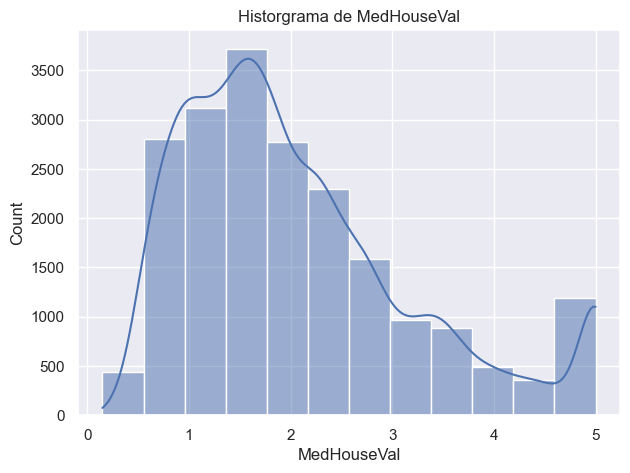

In [7]:
for column in df_california.columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(df_california[column], kde=True, bins=12)
    plt.title(f'Historgrama de {column}')
    plt.show()

Solo **MedInc** parece tener distribucion normal.

Se separa el dataset en entrenamiento y evaluación

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [9]:
# Escalemos los datos
scaler = StandardScaler()
# Con fit_transform se calculan los datos estadisticos y se escala
X_train_scaled = scaler.fit_transform(X_train)

print(f"Las medias del escalador es {scaler.mean_}")
print(f"Los desvío estándar del escalador es {np.sqrt(scaler.var_)}")

# Con transform solo se escala con los datos estadisticos calculados anteriormente.
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

Las medias del escalador es [ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]
Los desvío estándar del escalador es [1.90484248e+00 1.26131971e+01 2.45348438e+00 4.47482496e-01
 1.14018573e+03 1.23732074e+01 2.13566827e+00 2.00286090e+00]


In [10]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [11]:
regresion = LinearRegression()

regresion.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 2.0692396089424165
Los valores de los coeficientes de la recta sera [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [12]:
y_train_pred = regresion.predict(X_train_scaled)
var_total = np.var(y_train)
r2 = r2_score(y_train, y_train_pred)
var_modelo = r2 * var_total
print(f"Varianza Total del modelo: {var_total}")
print(f"Varianza Explicada por el modelo: {var_modelo}")

# El -8 -1 es por la cantidad de parametros mas la interseccion, ver numero de filas y columnas del histograma
var_residuos = np.sum((y_train - y_train_pred )**2)/(y_train.size-8-1)
print(f"Varianza Explicada por los residuos {var_residuos}")

Varianza Total del modelo: 1.3396959774719193
Varianza Explicada por el modelo: 0.8163383486451437
Varianza Explicada por los residuos 0.5236838438457824


El modelo es capaz de capturar aproximadamente el 60% de la variabilidad presente en los datos del label. Esto, es una cantidad significativa, lo que implica que el modelo esta capturando el comportamiento del taget.

4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

In [13]:
y_test_pred = regresion.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Es el cuadrado del residuo para cada punto de los datos de test promediados. Debe dar mayor a MAE.
print(f"Error cuadratico medio: {mse}")

# Es el valor absoluto del residuo para cada punto de los datos de test promediados.
print(f"Error absoluto medio: {mae}")
print(f"El coeficiente de Pearson es {r2}")

Error cuadratico medio: 0.5305677824766751
Error absoluto medio: 0.5272474538305952
El coeficiente de Pearson es 0.6093459727972159


Aquí se muestra un ejemplo de validación cruzada.

- Usamos método de 5-folds
- Usamos el MSE. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) usa el valor negativo por motivos de simplificar el funcionamiento de otras funciones de la libreria.

In [14]:
# Creamos un modelo
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Este la forma que se implementa en scikit-learn
cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Este calculo nos devuelve el valor de MSE para cada una de los folds
cv

array([-0.54786366, -0.5008472 , -0.52047089, -0.51611229, -0.54882174])

In [15]:
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {(-1)*cv.mean()}")
print(f"El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {cv.std()}")

La media del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.5268231539349311
El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.018742809748334602


In [16]:
# Acá generamos varios valores de alpha para la búsqueda pedida en el TP.

5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.

El mejor valor de alpha es: 6.565656565656566
El MSE correspondiente es: 0.5268175765319488


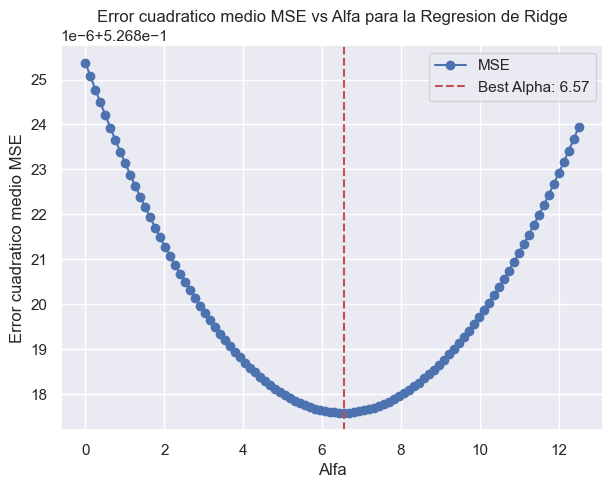

In [17]:
alpha_values = np.linspace(0, 12.5, 100)
mse_scores = []
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    cv_scores = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    mse_scores.append((-1)*cv_scores.mean())
best_alpha_index = np.argmin(mse_scores)
best_alpha = alpha_values[best_alpha_index]
best_mse = mse_scores[best_alpha_index]
print(f"El mejor valor de alpha es: {best_alpha}")
print(f"El MSE correspondiente es: {best_mse}")

plt.figure(figsize=(7, 5))
plt.plot(alpha_values, mse_scores, marker="o", linestyle="-", color="b", label="MSE")
plt.xlabel("Alfa")
plt.ylabel("Error cuadratico medio MSE")
plt.title("Error cuadratico medio MSE vs Alfa para la Regresion de Ridge")
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha:.2f}')
plt.legend()
plt.grid(True)
plt.show()

6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación.
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [18]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
print(f"Error cuadratico medio: {mse}")
print(f"Error cuadratico medio para la regresion de Ridge (alpha={best_alpha}): {mse_ridge}")
print(f"Error absoluto medio: {mae}")
print(f"Error absoluto medio para la regresion de Ridge (alpha={best_alpha}): {mae_ridge}")

Error cuadratico medio: 0.5305677824766751
Error cuadratico medio para la regresion de Ridge (alpha=6.565656565656566): 0.5304149219232503
Error absoluto medio: 0.5272474538305952
Error absoluto medio para la regresion de Ridge (alpha=6.565656565656566): 0.5272217082363999


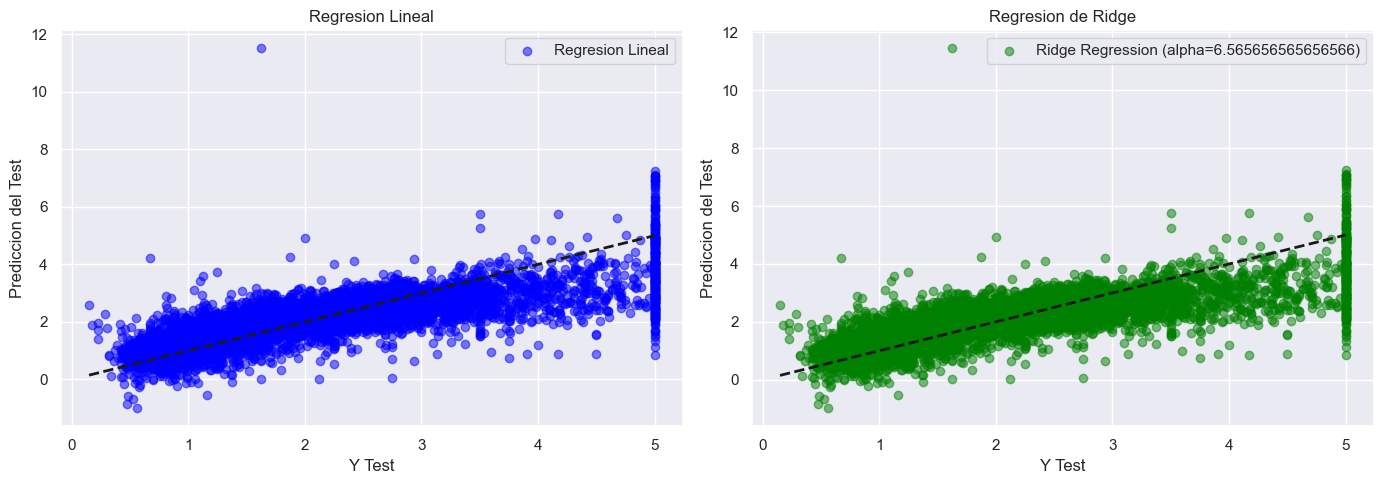

In [19]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue", label="Regresion Lineal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Y Test")
plt.ylabel("Prediccion del Test")
plt.title("Regresion Lineal")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color="green", label=f"Ridge Regression (alpha={best_alpha})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Y Test")
plt.ylabel("Prediccion del Test")
plt.title("Regresion de Ridge")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Viendo los valores de MSE y MAE podemos decir que la regresion de Ridge muestra una mejora marginal. De lo que se deduce, que habia una minima sobreestimacion de los coeficientes en la regresion lineal. Y con la regresion de Ridge, se redujo la varianza pero aumento el sesgo alcanzando un equilibrio.